<a href="https://colab.research.google.com/github/chaveroricardo/perceptron/blob/main/Notebooks/PerceptronClasificadorCancerEs%C3%B3fago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Classifier of Healthy Tissue and Cancerous Tissue in Microscopic Images of the Esophagus

![image.png](https://drive.google.com/uc?id=1K_j4CnOJeOmiROBiFwEW1M-kJkizrMk7)

## Step 1. Load Required Libraries and Modules

In [3]:
import random        # Module for randomization.
import pickle        # Module to backup Python objects as byte strings
                     # (object serialization).

import numpy as np   # Library for handling arrays and matrix operations.
import pandas as pd  # Library for handling data tables.

# Functions from the Scikit-image library to read and display an image.
from skimage.io import imshow, imread

# Sklearn (Scikit-learn) is the main library for machine learning.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

# Libraries for plotting and visualization.
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2. Data Reading.

### 2.1 Reading Labels (y)

In [4]:
# We read the data.

datos = pd.read_csv("https://raw.githubusercontent.com/AnIsAsPe/ClassificadorCancerEsofago/master/Datos/ClasesImagenes.csv", usecols=[1,2])


In [5]:
type(datos)

pandas.core.frame.DataFrame

In [6]:
# Display the first five records.
datos.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [7]:
# How many images are we going to work with?
datos.shape[0]

5063

In [8]:
# How many images do we have for each class?
datos['class_number'].value_counts(sort=False)

,count
class_number,
0,1469
1,3594


Class 0 corresponds to healthy tissue and Class 1 to cancerous tissue

In [9]:
# We save the image labels as a Pandas Series.
y = datos['class_number']

### 2.2 Reading Images (X)

**The first thing we need to do is unzip the zip file we saved on our drive**

In [10]:

# !unzip -u "/content/drive/MyDrive/MLBusiness/CarpetaImagenes.zip" -d "/content/drive/MyDrive/MLBusiness/Unzip/"


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
datos['image_filename'].head()

,image_filename
0,im_4_0.png
1,im_21_0.png
2,im_9_0.png
3,im_8_0.png
4,im_15_0.png


**We are going to read the first image; to do this, in addition to the image name, we need to add the directory path where the image is located.**

In [12]:
nombre_archivo = 'im_4_0.png'

ruta = '/content/drive/MyDrive/MLBusiness/Unzip/'

imagen = imread(ruta  + nombre_archivo, as_gray=True)

In [13]:
# What type of object is 'imagen'?
type(imagen)

numpy.ndarray

In [14]:
# What are the dimensions of 'imagen'?
imagen.shape

(260, 260)

In [15]:
# We explore the color level of some of the pixels in the image
imagen[72:80, 170:190]

array([[76, 76, 77, 78, 79, 79, 79, 80, 80, 82, 82, 83, 83, 84, 87, 87,
        88, 89, 90, 88],
       [71, 72, 72, 74, 74, 74, 75, 76, 76, 77, 77, 78, 78, 80, 82, 83,
        84, 85, 84, 84],
       [68, 68, 69, 71, 71, 72, 72, 74, 74, 74, 74, 74, 75, 76, 76, 79,
        80, 81, 82, 80],
       [67, 67, 67, 67, 69, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 74,
        76, 78, 80, 79],
       [66, 66, 66, 66, 67, 68, 68, 68, 68, 68, 68, 69, 69, 70, 71, 72,
        74, 76, 78, 78],
       [65, 65, 65, 65, 66, 67, 67, 67, 67, 67, 67, 67, 68, 69, 71, 72,
        74, 75, 77, 77],
       [63, 63, 63, 63, 63, 63, 63, 63, 63, 65, 65, 65, 66, 67, 68, 70,
        71, 72, 74, 74],
       [63, 63, 63, 63, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 65, 66,
        67, 69, 72, 71]], dtype=uint8)

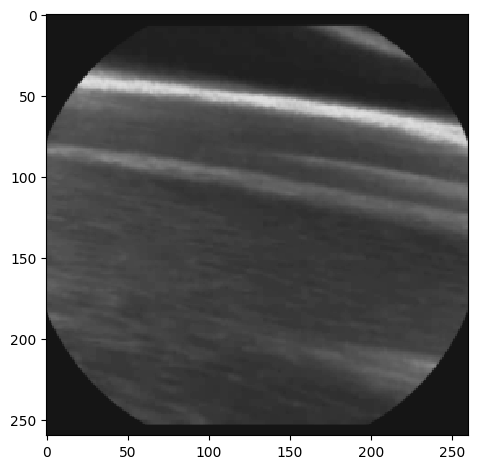

In [16]:
imshow(imagen)

**Now we are going to do the same for all images**

In [17]:
datos['image_filename']

,image_filename
0,im_4_0.png
1,im_21_0.png
2,im_9_0.png
3,im_8_0.png
4,im_15_0.png
...,...
5058,im_114_55.png
5059,im_7_55.png
5060,im_52_55.png
5061,im_10_55.png


In [18]:
%time  img = datos['image_filename'].apply(lambda x: imread(ruta + x, as_gray=True))

KeyboardInterrupt: 

<h2>We back up the img object in a pickle file.<h2>

(if you want to learn more about Python pickles, check [this link](https://programacion.net/articulo/los_pickles_de_python_1860))


In [ ]:
## Save to pickle file
#ruta2 = '/content/drive/MyDrive/MLBusiness/'  # directory where it will be saved
#pickle.dump(img, open(ruta2 + "imagenes_numpy.pkl", 'wb'))

In [20]:
# Read pickle file
ruta2 = '/content/drive/MyDrive/MLBusiness/'
img = pickle.load(open(ruta2 + "imagenes_numpy.pkl", 'rb'))

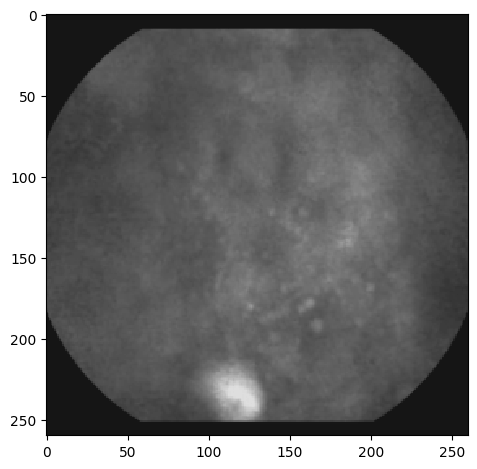

In [21]:
imshow(img[47])

- Dimension 0: 260 rows of pixels from top to bottom
- Dimension 1: 260 columns of pixels from left to right


####  Transform Images into Vectors

In [22]:
# A pandas series is also a sequence (like lists, tuples, strings, or numpy arrays).

type(img)

pandas.core.series.Series

In [23]:
# Number of elements in the series
img.shape

(5063,)

In [24]:
# Each element of my sequence is a 260 x 260 matrix
img[3673].shape

(260, 260)

The first step is to transform the sequence of matrices img into a single matrix

In [25]:
IMG = np.stack(img, axis=0)   # Takes a sequence of matrices and stacks them along
                              # a third axis to make a single array
IMG.shape

(5063, 260, 260)

Then flatten the 2D matrix (260x260 pixels) of each image to obtain a vector per image.

In [26]:
X = IMG.reshape(5063, 67600)
X.shape

(5063, 67600)

##### We visualize examples of both image classes

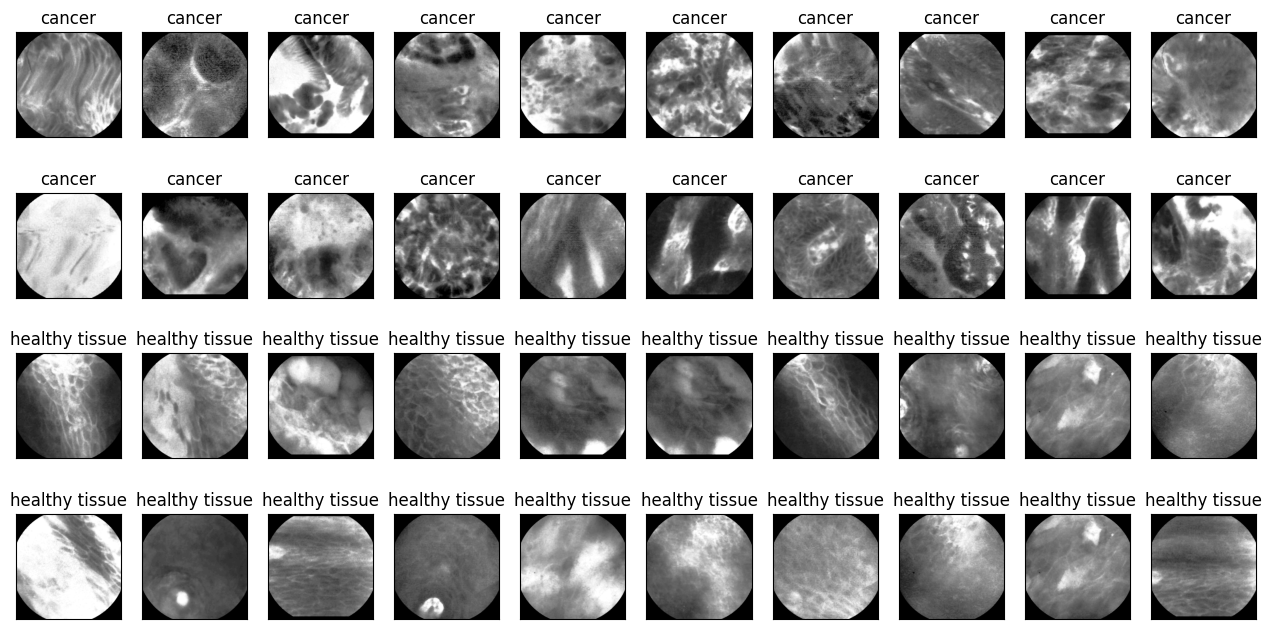

In [27]:
# With Pandas' GroupBy method, we split the data frame into two, according to our label.
porClase = datos.groupby('class_number')

# We randomly select n samples from each subset and save the positions of
# the cancerous images in the "c" list and healthy tissue images in "s".
n = 20
c = random.sample(porClase.get_group(1).index.tolist(), n)
s = random.sample(porClase.get_group(0).index.tolist(), n)

# We create the space for the 40 images we are going to display
fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 4

# We display the images
for i in range(0, 40):
    fig.add_subplot(rows, columns, i+1)
    if i < 20:
        plt.imshow(img[c[i]], cmap='Greys_r')
        plt.title('cancer')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow(img[s[i-20]], cmap='Greys_r')
        plt.title('healthy tissue')
        plt.xticks([])
        plt.yticks([])
plt.show()

## Step 3. Building Our Classifier

### 3.1 Create Training and Test Subsets


In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=0)

In [29]:
# What are the training and test sets like?
print("Training set")
print("X: ", X_train.shape)
print("y: ", y_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print('Healthy Tissue:      ', counts[0],'\nDysplasia or Cancer: ', counts[1],'\n')

print("Test set")
print("X: ", X_test.shape)
print("y: ", y_test.shape)
unique, counts = np.unique(y_test, return_counts=True)
print('Healthy Tissue:       ', counts[0],'\nDysplasia or Cancer: ', counts[1],'\n')

Training set
X:  (3544, 67600)
y:  (3544,)
Healthy Tissue:       1043 
Dysplasia or Cancer:  2501 

Test set
X:  (1519, 67600)
y:  (1519,)
Healthy Tissue:        426 
Dysplasia or Cancer:  1093 



### 3.2 Training



In [30]:
model = Perceptron(max_iter=1000, random_state=0, verbose=False)
model.fit(X_train, y_train)

print("Iterations: ", model.n_iter_)

Iterations:  44


In [31]:
# We save the model coefficients
betas = model.coef_
betas.shape

(1, 67600)

In [32]:
beta0 = model.intercept_
beta0

array([-42.])

In [33]:
betas[0, 50310:50320]

array([ -1.92002706,  26.43550275,  48.33832196,  60.5412651 ,
        36.79920392,  20.46658157,  -2.35208118, -16.18895686,
       -16.80207686,   4.81493412])

### 3.3 Prediction

In [34]:
y_predict = model.predict(X_test)  # Clasifica cada imagen de X_test
y_predict[:20]

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

### 3.4 Evaluation

In [35]:
y_test.to_numpy()[:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [36]:
print("Training set accuracy: %.2f%%" % (model.score(X_train, y_train)*100.0))
print("Test set accuracy: %.2f%%" % (model.score(X_test, y_test)*100.0))

Training set accuracy: 95.49%
Test set accuracy: 90.19%


In [37]:
data = {'Y_Real':  y_test,
        'Y_Prediccion':y_predict
        }
df = pd.DataFrame(data)
df

,Y_Real,Y_Prediccion
3284,0,0
142,1,1
2625,1,1
2066,1,1
72,0,1
...,...,...
1569,1,1
5057,1,1
1422,0,0
2044,1,1


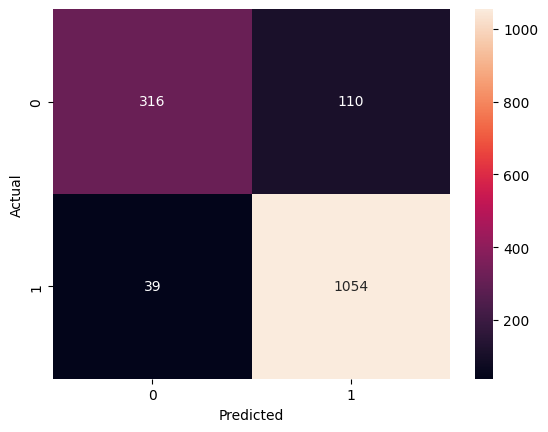

In [38]:
# Confusion matrix

confusion_matrix = pd.crosstab(df['Y_Real'],
                               df['Y_Prediccion'],
                               rownames=['Actual'],
                               colnames=['Predicted'])
confusion_matrix
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


## Step 4. Training Perceptron Using Margin

In [39]:
model2 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.0001)
model2.fit(X_train, y_train)

print("Training set accuracy: %.2f%%" % (model2.score(X_train, y_train)*100.0))
print("Test set accuracy: %.2f%%" % (model2.score(X_test, y_test)*100.0))



Training set accuracy: 77.48%
Test set accuracy: 77.49%


In [40]:
model3 = Perceptron(max_iter=1000,
                    random_state=0,
                    verbose=False,
                    penalty='l2',
                    alpha=0.000005)

model3.fit(X_train, y_train)

print("Training set accuracy: %.2f%%" % (model3.score(X_train, y_train)*100.0))
print("Test set accuracy: %.2f%%" % (model3.score(X_test, y_test)*100.0))


Training set accuracy: 94.38%
Test set accuracy: 90.06%


In [41]:
model4 = Perceptron(max_iter=1000, random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model4.fit(X_train, y_train)

print("Training set accuracy: %.2f%%" % (model4.score(X_train, y_train)*100.0))
print("Test set accuracy: %.2f%%" % (model4.score(X_test, y_test)*100.0))

Training set accuracy: 98.59%
Test set accuracy: 92.03%


# **1. Adding Additional Metrics**

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Test set evaluation
y_pred = model.predict(X_test)

# Additional metric calculations
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.90
Recall (Sensitivity): 0.96
Precision: 0.91
F1-Score: 0.93


# **2. Implementing Cross-Validation for Robust Evaluation**

In [43]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation on the training set
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores (5-fold):", cross_val_scores)
print("Mean cross-validation accuracy:", cross_val_scores.mean())


Cross-validation scores (5-fold): [0.89703808 0.91960508 0.91114245 0.75317348 0.9039548 ]
Mean cross-validation accuracy: 0.8769827799160114


# **3. Hyperparameter Justification and Optimization**

In [44]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 1500, 2000]
}

# Set up model and GridSearchCV
grid_search = GridSearchCV(Perceptron(random_state=0), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Best parameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}
Best cross-validation score: 0.7691823448319827


Perceptron(penalty='l2')

# **4. Saving the Model for Future Use**

In [45]:
import pickle

# Save trained model
with open("cancer_classifier_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Load the model (in Streamlit or for further testing)
with open("cancer_classifier_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


# **5. Hyperparameter Tuning with GridSearchCV**

In [ ]:
# Step 1: Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Define the hyperparameters to test
param_grid = {
    'penalty': ['l2'],               # L2 regularization
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strengths
    'max_iter': [1000, 1500, 2000]   # Maximum number of iterations
}

# Set up the Perceptron model and GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(Perceptron(random_state=0), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameters and score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Optimized Model Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")

